In [28]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("17-04_to_02-05.csv")
df.head()

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,address_district,address_ward,address_street,price(billionVND)
0,22539926,225.0,45.0,3.0,5.0,Sổ hồng,10.839189,106.661079,850.0,5.00,9.0,1.0,12.0,12.0,2.0,3.0,3.0,0.0,1.0,17.0,5.0,Quận Gò Vấp,Phường 11,Thống Nhất,6.50
1,22524911,126.0,33.0,5.0,6.0,Sổ hồng,10.807009,106.691612,850.0,3.20,9.5,5.0,13.0,15.0,9.0,11.0,12.0,0.0,4.0,4.0,11.0,Quận Bình Thạnh,Phường 7,Lê Quang Định,5.10
2,22521691,109.0,63.0,4.0,4.0,Sổ hồng,10.812072,106.687519,850.0,4.05,12.0,2.0,17.0,9.0,7.0,8.0,3.0,0.0,2.0,1.0,8.0,Quận Bình Thạnh,Phường 5,Lê Quang Định,6.95
3,22538386,78.0,39.0,2.0,2.0,Sổ hồng,10.805522,106.705147,850.0,2.80,13.0,1.0,7.0,10.0,4.0,11.0,4.0,0.0,1.0,1.0,7.0,Quận Bình Thạnh,Phường 24,Bùi Đình Túy,4.78
4,22448804,300.0,60.0,3.0,4.0,Sổ hồng,10.845728,106.644039,850.0,4.00,15.0,0.0,12.0,6.0,2.0,3.0,0.0,0.0,2.0,8.0,1.0,Quận Gò Vấp,Phường 14,Đường 44,7.20


## Khám phá dữ liệu

### 1. Thống kê giá nhà theo từng quận

#### Giá nhà trên mét vuông

= giá tiền / diện tích sử dụng

In [30]:
df['area'].describe()

count    17882.000000
mean       119.977519
std        362.173654
min          1.000000
25%         52.000000
50%         74.000000
75%        120.000000
max      34444.000000
Name: area, dtype: float64

In [31]:
df.drop(df[df['area'] < 10].index, inplace=True)

In [32]:
df['price(billionVND)'].describe()

count    16688.000000
mean        27.301150
std        129.131824
min          0.003500
25%          5.470000
50%          8.990000
75%         22.000000
max       7600.000000
Name: price(billionVND), dtype: float64

In [42]:
df['price_per_square_meters(mil/m2)'] = df['price(billionVND)']/df['area']*1000

In [43]:
mean_district_prices = df.groupby('address_district')['price_per_square_meters(mil/m2)'].mean().sort_values(ascending=True)
mean_district_prices

address_district
 Huyện Củ Chi                   12.461423
 Huyện Cần Giờ                  33.962264
 Huyện Bình Chánh               40.070465
 Huyện Hóc Môn                  48.402180
 Quận 12                        66.520262
 Quận 8                         91.322522
 Huyện Nhà Bè                   96.350917
 Quận Gò Vấp                   107.378628
 Quận Tân Phú                  127.168720
 Quận 6                        143.150129
 Quận Bình Thạnh               144.602729
 Quận 7                        145.543302
 Quận Tân Bình                 156.957862
 Quận 4                        172.034626
 Quận 11                       173.655711
 Quận Bình Tân                 185.663925
 Quận 9 (TP. Thủ Đức)          207.202067
 Quận 2 (TP. Thủ Đức)          224.775433
 Quận 10                       231.796495
 Quận 5                        263.229265
 Quận Thủ Đức (TP. Thủ Đức)    272.356716
 Quận Phú Nhuận                390.939679
 Quận 3                        476.836220
 Quận 1          

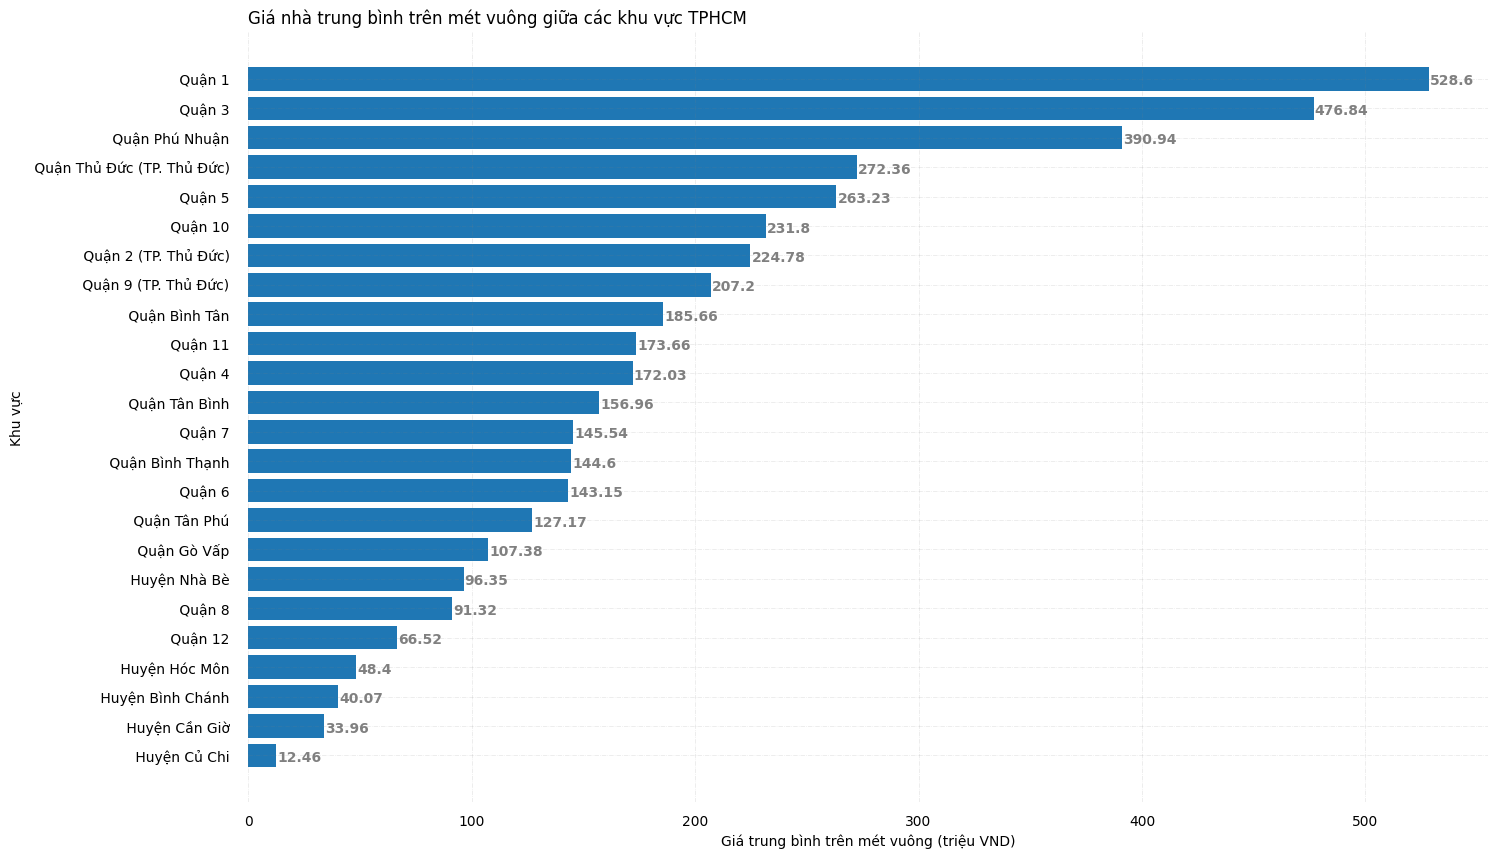

In [44]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))
 
# Horizontal Bar Plot
ax.barh(mean_district_prices.index, mean_district_prices)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# Show top values 
# ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.2, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Giá nhà trung bình trên mét vuông giữa các khu vực TPHCM', loc ='left')
ax.set_xlabel('Giá trung bình trên mét vuông (triệu VND)')
ax.set_ylabel('Khu vực')
# Show Plot
plt.show()

Nhận xét:
- Quận 1 có mức giá đất cao nhất thành phố, đạt 528,6 triệu đồng/m2, gấp 42 lần so với quận có mức giá thấp nhất là Huyện Củ Chi (chỉ 12,46 triệu đồng/m2).
- Quận 3 cũng nằm trong nhóm có giá đất cao nhất TP.HCM với 476,84 triệu đồng/m2. Quận Phú Nhuận đứng thứ 3 với 390,94 triệu đồng/m2.
- Sự chênh lệch giá đất giữa các khu vực trung tâm và ngoại thành là rất lớn. Trong khi các quận 1, 3, Phú Nhuận có giá trên 300 triệu đồng/m2 thì các huyện Hóc Môn, Bình Chánh, Cần Giờ, Củ Chi chỉ dưới 50 triệu đồng/m2.
- TP.Thủ Đức và các quận thuộc TP.Thủ Đức như quận 2, 9 cũng có mức giá khá cao, trên 200 triệu đồng/m2, phản ánh sự phát triển của khu vực này.
- Các quận trung tâm khác như quận 5, 10, Bình Tân, Tân Bình vẫn đạt mức giá cao từ 150-300 triệu đồng/m2.
- Trong số các quận ngoại thành, quận Gò Vấp và Nhà Bè có mức giá khá cao so với các huyện khác, lần lượt đạt 107,38 và 96,35 triệu đồng/m2.

Nhìn chung, biểu đồ phản ánh rõ nét sự phân hóa giá nhà đất theo vùng địa lý tại TP.HCM, với sự chênh lệch rất lớn giữa trung tâm và ngoại thành, phù hợp với mô hình phát triển kinh tế - xã hội không cân đối giữa các khu vực của thành phố.

Tại sao giá quận 1 lại cao?
Tại sao giá nhà 3 quận trên lại cao gấp nhiều lần những quận bên dưới?